## The Battle of Neighborhoods in Italian Dishes 

Sebastián Carmona Ángel

## 1. Introduction:

Toronto is the capital city of the Canadian province of Ontario. With a recorded population of 2,731,571 in 2016, it is the most populous city in Canada and the fourth most populous city in North America. The city is the anchor of the Golden Horseshoe, an urban agglomeration of 9,245,438 people (as of 2016) surrounding the western end of Lake Ontario, while the Greater Toronto Area (GTA) proper had a 2016 population of 6,417,516. Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world. According to the United Nations Development Programme, Toronto has the second-highest percentage of constant foreign-born population among world cities, after Miami, Florida.

According to Thrillist, Food is a big deal in Toronto. Not only do we need it to live, but they’ve come into a foodie destination. New restaurants are constantly opening, and chefs continue to push culinary boundaries to come up with new and innovative ideas. It’s a bit dizzying just how MUCH good stuff there is to eat here. But don’t be daunted.

In this project we will analyze all the Italian Restaurants currently present in Toronto, and check the top Italian Restaurants to give a full analysis.

### 1.1 Background

* **Business Problem**

In this project we will check all the Italian Restaurants that are present in Toronto. We will analyse the data of Toronto’s postal codes and see where are the most Italian Restaurants. Yhe major purpose of this project, is to suggest visualize what does the best italian restaurants have and where are they located for future italian restaurants.

* **Target Audience**

The people who will benefit for this project are future chefs and business persons who will like to set up a new italian restaurant in Toronto, knowing where will be the best point of location in Toronto of where is the best place to set up this new restaurant. Also, to know the highest competitors and what does people expect and like from them.


### 1.2 Foursquare API:

This project would use Four-square API as its prime data gathering source as it has a database of millions of places, especially their places API which provides the ability to perform location search, location sharing and details about the restaurants that we need.

### 1.3 Work Flow:

Using Foursquare API credentials, we will mined the diferent italian restaurants around Toronto, and we will search the top 5, and see the diffrerent atributes of each one of them. 

### 1.4 Libraries Used to Develope the Project:

* Pandas: For creating and manipulating dataframes.

* Folium: Python visualization library would be used to visualize the neighborhoods cluster distribution of using interactive leaflet map.

* Scikit Learn: For importing k-means clustering.

* JSON: Library to handle JSON files.

* XML: To separate data from presentation and XML stores data in plain text format.

* Geocoder: To retrieve Location Data.

* Beautiful Soup and Requests: To scrap and library to handle http requests.

* Matplotlib: Python Plotting Module.

## 2. Data Description:

**Toronto Postal Codes data Link**: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

This is a list of postal codes in Canada where the first letter is M. Postal codes beginning with M are located within the city of Toronto in the province of Ontario. Only the first three characters are listed, corresponding to the Forward Sortation Area. This table consist of "Postal Code", "Borough" and "Neighborhood"

**Latitud and Longitud**: https://cocl.us/Geospatial_data

We will wrangle and clean the data, leaving them useful for the project, erasing any "Not Assigned" in the **Borough** column, also if there is any "Not Assigned" value in the **Neighborhood** column we will copy the same of the **Bourough** column. Also, if there is a same postal code and borough for diferent neighborhood we will group them in to a single row.

**Foursquare API**
We will utilize the Foursquare location data, with the Data Frame cleaned.
Venues of all Italian Restaurants in Toronto city and their rating, likes and tips information data.
Foursquare is a location data provider with information about all manner of venues and events within an area of interest. Such information includes venue names, locations, menus and even photos. As such, the foursquare location platform will be used as the sole data source since all the stated required information can be obtained through the API.

**Folium Package**
Visualize the data in form of Boundary Map.
Folium package (Folium is a python library that can create interactive leaflet map using coordinate data.)


## 3. Methodology

As a database, I used GitHub repository in my study. My master data which has the main components Borough, Postal Code, Neighborhood, Latitude and Longitude informations of the city.

Importing necessary libraries for the project

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge bs4 --yes 
from bs4 import BeautifulSoup

!conda install -c conda-forge lxml --yes
import requests
import json # library to handle JSON files

#Use geopy library to get the latitude and longitude values of New York City
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.cm as cm
import matplotlib.colors as colors

# import kmeans from clustering stage
from sklearn.cluster import KMeans

!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - bs4


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2020.7.22-0 --> conda-forge::ca-certificates-2020.6.20-hecda079_0
  certifi               pkgs/main::certifi-2020.6.20-py36_0 --> conda-forge::certifi-2020.6.20-py36h9f0ad1d_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


Converting content of Toronto Postal Code table as dataframe

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df.head()

,Postal Code,District,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


We rename "Neighborhood" typo

In [3]:
df.rename(columns={'Neighbourhood':'Neighborhood'}, 
                 inplace=True)
df.head()

,Postal Code,District,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


Also we rename District to "Borough"

In [4]:
df.rename(columns={'District':'Borough'}, 
                 inplace=True)
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


Clean dataframe, remove Boroughs that are 'Not assigned' and if a neighborhood is not assigned, but it has a borough, then the neighborhood will be the same as the borough.

In [5]:
canada_df = df.drop(df[(df['Borough'] == 'Not assigned')].index)
canada_df.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [6]:
i = 0
for i in range(0,canada_df.shape[0]):
    if canada_df.iloc[i][2] == 'Not assigned':
        canada_df.iloc[i][2] = toronto.iloc[i][1]
        i = i+1

canada_df = canada_df.groupby(['Postal Code','Borough'])['Neighborhood'].apply(', '.join).reset_index()
canada_df

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [7]:
def neighborhood_list(grouped):    
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))
                    
df_1 = canada_df.groupby(['Postal Code', 'Borough'])
df_2 = df_1.apply(neighborhood_list).reset_index(name='Neighborhood')
df_2.describe()

,Postal Code,Borough,Neighborhood
count,103,103,103
unique,103,10,99
top,M4G,North York,Downsview
freq,1,24,4


In [8]:
print(df_2.shape)
df_2.head()

(103, 3)


,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


IMPORTING LAT AND LONG WITH CSV

In [9]:
#Get data lat/long data from csv
lat_long_coord_df = pd.read_csv("Geospatial_Coordinates.csv")    
lat_long_coord_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
df_toronto = pd.merge(df_2, lat_long_coord_df, how='left', left_on = 'Postal Code', right_on = 'Postal Code')
df_toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [11]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="my_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [12]:

def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'GQFWSDLBBKZAEMWCJJHY0H3NPVDTNNTD1LM2N31SW12QUU5B' # your Foursquare ID
    CLIENT_SECRET = 'FSHFXZWGV1V34VEVRGUYNV2ZZFSHL1FXVHITKTULNZYXRRFJ' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

## Exploratory Data Analysis

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


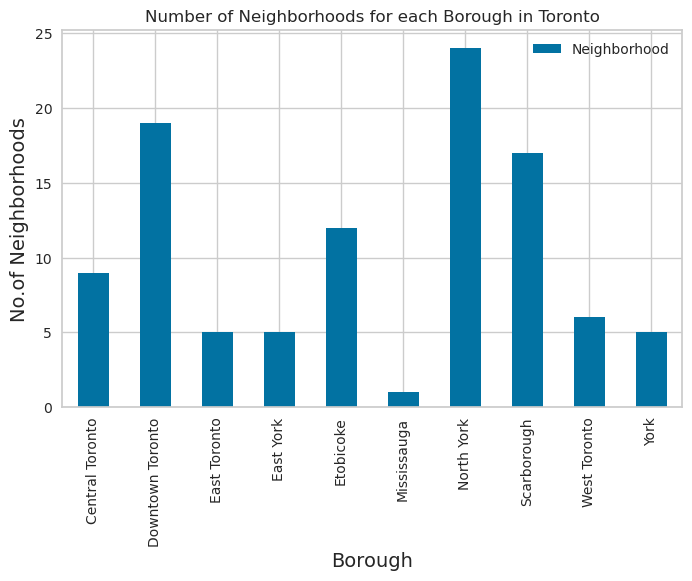

In [13]:
plt.figure(figsize=(8,5), dpi = 100)
# title
plt.title('Number of Neighborhoods for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 14)
#On y-axis
plt.ylabel('No.of Neighborhoods', fontsize=14)
#giving a bar plot
df_2.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

**North York** Borough has the highest number of Neighborhoods in Toronto City, mostly 25 numbers of neighborhoods

In [14]:
df_toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [15]:
# The total neighborhood list which contains italian restaurants in Toronto City
column_names=['Borough', 'Neighborhood', 'ID','Name']
it_rest_toronto=pd.DataFrame(columns=column_names)
count=1
for row in df_toronto.values.tolist():
    Postalcode, Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    italian_restaurants=venues[venues['Category']=='Italian Restaurant']   
    print('(',count,'/',len(df_2),')','Italian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(italian_restaurants)))
    for restaurant_detail in italian_restaurants.values.tolist():
        id, name , category=restaurant_detail
        it_rest_toronto = it_rest_toronto.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 103 ) Italian Restaurants in Malvern, Rouge, Scarborough:0
( 2 / 103 ) Italian Restaurants in Rouge Hill, Port Union, Highland Creek, Scarborough:1
( 3 / 103 ) Italian Restaurants in Guildwood, Morningside, West Hill, Scarborough:0
( 4 / 103 ) Italian Restaurants in Woburn, Scarborough:0
( 5 / 103 ) Italian Restaurants in Cedarbrae, Scarborough:0
( 6 / 103 ) Italian Restaurants in Scarborough Village, Scarborough:0
( 7 / 103 ) Italian Restaurants in Kennedy Park, Ionview, East Birchmount Park, Scarborough:0
( 8 / 103 ) Italian Restaurants in Golden Mile, Clairlea, Oakridge, Scarborough:0
( 9 / 103 ) Italian Restaurants in Cliffside, Cliffcrest, Scarborough Village West, Scarborough:0
( 10 / 103 ) Italian Restaurants in Birch Cliff, Cliffside West, Scarborough:0
( 11 / 103 ) Italian Restaurants in Dorset Park, Wexford Heights, Scarborough Town Centre, Scarborough:1
( 12 / 103 ) Italian Restaurants in Wexford, Maryvale, Scarborough:0
( 13 / 103 ) Italian Restaurants in Agincourt, S

In [16]:
print(it_rest_toronto.shape)
it_rest_toronto.head(5)

(116, 4)


,Borough,Neighborhood,ID,Name
0,Scarborough,"Rouge Hill, Port Union, Highland Creek",4bccf9bf511f9521ce0eb4c7,Fratelli Village Pizzeria
1,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",4bf32a9594af2d7fd4363972,Nova Ristorante
2,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan",4b5a2bf2f964a520deb128e3,Remezzo Italian Bistro
3,North York,"Willowdale, Willowdale East",4b69ad98f964a520f3ac2be3,Paisano's
4,North York,"Willowdale, Willowdale East",4ad4c05ff964a52031f720e3,Mezza Notte Trattoria


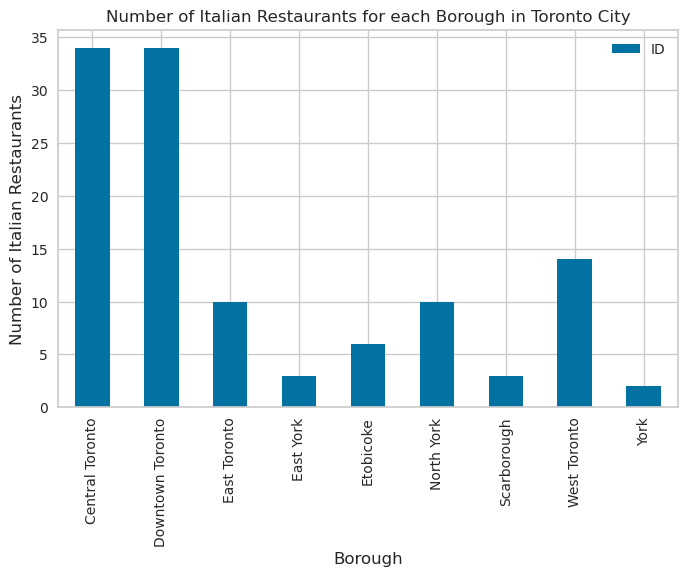

In [17]:
# To know the maximum number of Italian Restaurants in each Borough we will plot the data grouping by Borough
plt.figure(figsize=(8,5), dpi = 100)
# Title
plt.title('Number of Italian Restaurants for each Borough in Toronto City')
# x-axis
plt.xlabel('Borough', fontsize = 12)
# y-axis
plt.ylabel('Number of Italian Restaurants', fontsize=12)
#Creating bar plot
it_rest_toronto.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

**Central Toronto and Downtown Toronto** have the most amount of Italian Restaurants in the city according of the bar plot above. So, we will see if there is any difference in the amount of Restaurants.

In [18]:
it_rest_toronto.groupby('Borough')['ID'].count()

Borough
Central Toronto     34
Downtown Toronto    34
East Toronto        10
East York            3
Etobicoke            6
North York          10
Scarborough          3
West Toronto        14
York                 2
Name: ID, dtype: int64

We could see that **Central Toronto** Borough has 34 Italian Restaurants as **DownTown Toronto**, Followed by **West Toronto** which has 14 Italian Restaurants, as for **North York**, the Borough with most amount of neighborhoods, has only 8 Italian Restaurants.

In [19]:
## Now we will check top 5 Neighborhoods that has the max number of Italian Restaurants present.
Toronto_top_5_Neighbor = it_rest_toronto.groupby('Neighborhood')['ID'].count().nlargest(5).to_frame(name='Total')
Toronto_top_5_Neighbor=Toronto_top_5_Neighbor.reset_index()
Toronto_top_5_Neighbor.rename(index=str, columns={"index": "Neighborhood", "Total": "Total Italian Restaurants"}, inplace=True)
Toronto_top_5_Neighbor

,Neighborhood,Total Italian Restaurants
0,Davisville,8
1,Davisville North,6
2,"The Annex, North Midtown, Yorkville",5
3,"Moore Park, Summerhill East",4
4,"Summerhill West, Rathnelly, South Hill, Forest...",4


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


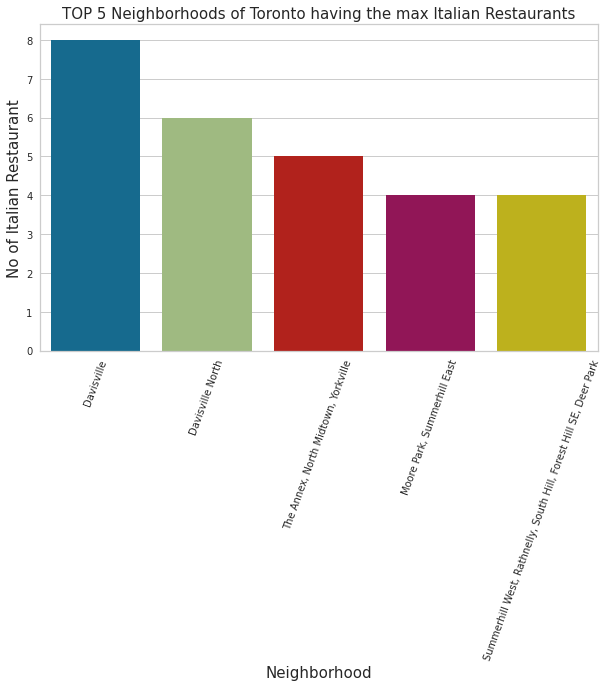

In [20]:
# We will Visualize the data in Bar Chart Graph
import seaborn as sns
fig = plt.figure(figsize=(10,6))
s=sns.barplot(x="Neighborhood", y="Total Italian Restaurants", data=Toronto_top_5_Neighbor)
s.set_xticklabels(s.get_xticklabels(), rotation=70)
plt.title('TOP 5 Neighborhoods of Toronto having the max Italian Restaurants', fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel ("No of Italian Restaurant", fontsize=15)
plt.savefig("TOP_5_Neighborhood.png", dpi=300)
plt.show()

Analysing the chart and the Top 5 table. The **Davisville** neighborhood is the first with 8 restaurants, followed by **Davisville North** with 6 restaurants 

In [21]:
## We will check in which Borough Davisville falls under.
it_rest_toronto[it_rest_toronto['Neighborhood']=='Davisville']

,Borough,Neighborhood,ID,Name
27,Central Toronto,Davisville,4b71edddf964a520cb642de3,Positano
28,Central Toronto,Davisville,5bdcf092cb3fd2002c311f71,Bar Buca
29,Central Toronto,Davisville,4ae86fb7f964a52053af21e3,Balsamico
30,Central Toronto,Davisville,4bd4b2546798ef3bb235628d,Florentia Ristorante
31,Central Toronto,Davisville,4b6b758ff964a520270a2ce3,Five Doors North
32,Central Toronto,Davisville,4ad4c061f964a520a2f720e3,Grazie Ristorante
33,Central Toronto,Davisville,4ad4c05cf964a52004f620e3,Grano
34,Central Toronto,Davisville,4bd229df046076b062667371,Il Sogno


This falls in **Central Toronto** Borough, which hast the maximum number of Italian restaurants of the city. 

In [22]:
toronto_5_merge = Toronto_top_5_Neighbor.join(df_toronto.set_index("Neighborhood"), on="Neighborhood")

print(toronto_5_merge.shape)
toronto_5_merge.head()

(5, 6)


,Neighborhood,Total Italian Restaurants,Postal Code,Borough,Latitude,Longitude
0,Davisville,8,M4S,Central Toronto,43.704324,-79.388790
1,Davisville North,6,M4P,Central Toronto,43.712751,-79.390197
2,"The Annex, North Midtown, Yorkville",5,M5R,Central Toronto,43.672710,-79.405678
3,"Moore Park, Summerhill East",4,M4T,Central Toronto,43.689574,-79.383160
4,"Summerhill West, Rathnelly, South Hill, Forest...",4,M4V,Central Toronto,43.686412,-79.400049


In [23]:
import folium
# # create map of top 5 Neighborhood having Indian Restaurant using latitude and longitude values

#Obtain the coordinates from the dataset itself, just averaging Latitude/Longitude of the current dataset 
latitude_toronto = df_toronto['Latitude'].mean()
longitude_toronto = df_toronto['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(latitude_toronto, longitude_toronto))


Toronto_5_topmap = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# add markers to map
for lat, lng, label in zip(toronto_5_merge['Latitude'], toronto_5_merge['Longitude'], 
                           toronto_5_merge['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Toronto_5_topmap)  
    
Toronto_5_topmap

The geographical coordinates of Toronto are 43.70460773398059, -79.39715291165048


In [24]:
## We will create a function to get all the venue details such as Ratings , Likes and Tips for all the Restaurants in Toronto city.

def get_venue_details(venue_id):
        
    CLIENT_ID = 'GQFWSDLBBKZAEMWCJJHY0H3NPVDTNNTD1LM2N31SW12QUU5B' # your Foursquare ID
    CLIENT_SECRET = 'FSHFXZWGV1V34VEVRGUYNV2ZZFSHL1FXVHITKTULNZYXRRFJ' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [25]:
#Neighborhood list that contains it restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
it_rest_toronto_popular=pd.DataFrame(columns=column_names)
count=1


for row in it_rest_toronto.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(it_rest_toronto),')','processed')
    it_rest_toronto_popular = it_rest_toronto_popular.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID                       Name  Likes  Rating  Tips
0  4bccf9bf511f9521ce0eb4c7  Fratelli Village Pizzeria     18     7.6    15
( 1 / 116 ) processed
                         ID             Name  Likes  Rating  Tips
0  4bf32a9594af2d7fd4363972  Nova Ristorante     17     7.1     5
( 2 / 116 ) processed
                         ID                    Name  Likes  Rating  Tips
0  4b5a2bf2f964a520deb128e3  Remezzo Italian Bistro     46     7.8    19
( 3 / 116 ) processed
                         ID       Name  Likes  Rating  Tips
0  4b69ad98f964a520f3ac2be3  Paisano's     17     6.7    13
( 4 / 116 ) processed
                         ID                   Name  Likes  Rating  Tips
0  4ad4c05ff964a52031f720e3  Mezza Notte Trattoria     12     6.1     9
( 5 / 116 ) processed
                         ID                Name  Likes  Rating  Tips
0  4bdaff7463c5c9b67bcb2568  Sorento Restaurant      9     7.7     8
( 6 / 116 ) processed
                         ID         

In [26]:
it_rest_toronto_popular.head(10)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Scarborough,"Rouge Hill, Port Union, Highland Creek",4bccf9bf511f9521ce0eb4c7,Fratelli Village Pizzeria,18,7.6,15
1,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",4bf32a9594af2d7fd4363972,Nova Ristorante,17,7.1,5
2,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan",4b5a2bf2f964a520deb128e3,Remezzo Italian Bistro,46,7.8,19
3,North York,"Willowdale, Willowdale East",4b69ad98f964a520f3ac2be3,Paisano's,17,6.7,13
4,North York,"Willowdale, Willowdale East",4ad4c05ff964a52031f720e3,Mezza Notte Trattoria,12,6.1,9
5,North York,Don Mills,4bdaff7463c5c9b67bcb2568,Sorento Restaurant,9,7.7,8
6,North York,Downsview,4c79724281bca0930178fd14,Mastro's Ristorante,2,6.6,6
7,East York,Leaside,0,0,0,0.0,0
8,East York,Thorncliffe Park,0,0,0,0.0,0
9,East York,"East Toronto, Broadview North (Old East York)",0,0,0,0.0,0


In [27]:
# Total number of Italian Restaurants which has all the statistics
it_rest_toronto_popular.shape

(116, 7)

In [28]:
# Lets save this data
it_rest_toronto_popular.to_csv('it_rest_toronto_popular.csv', index=False)

In [29]:
it_popular=pd.read_csv('it_rest_toronto_popular.csv')
it_popular.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Scarborough,"Rouge Hill, Port Union, Highland Creek",4bccf9bf511f9521ce0eb4c7,Fratelli Village Pizzeria,18,7.6,15
1,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",4bf32a9594af2d7fd4363972,Nova Ristorante,17,7.1,5
2,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan",4b5a2bf2f964a520deb128e3,Remezzo Italian Bistro,46,7.8,19
3,North York,"Willowdale, Willowdale East",4b69ad98f964a520f3ac2be3,Paisano's,17,6.7,13
4,North York,"Willowdale, Willowdale East",4ad4c05ff964a52031f720e3,Mezza Notte Trattoria,12,6.1,9


In [30]:
#Now check the datatypes of the columns , we need to make every column as float to get a proper result
it_popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       116 non-null    object 
 1   Neighborhood  116 non-null    object 
 2   ID            116 non-null    object 
 3   Name          116 non-null    object 
 4   Likes         116 non-null    int64  
 5   Rating        116 non-null    float64
 6   Tips          116 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ KB


In [31]:
it_popular['Likes']=it_popular['Likes'].astype('float64')
it_popular['Tips']=it_popular['Tips'].astype('float64')
it_popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       116 non-null    object 
 1   Neighborhood  116 non-null    object 
 2   ID            116 non-null    object 
 3   Name          116 non-null    object 
 4   Likes         116 non-null    float64
 5   Rating        116 non-null    float64
 6   Tips          116 non-null    float64
dtypes: float64(3), object(4)
memory usage: 6.5+ KB


In [32]:
#We will now check the Restuarant with maximum Likes
it_popular.iloc[it_popular['Likes'].idxmax()]

Borough                 Downtown Toronto
Neighborhood    Garden District, Ryerson
ID              4b49183ff964a520a46526e3
Name                             Terroni
Likes                                279
Rating                               8.6
Tips                                  95
Name: 49, dtype: object

In [33]:
#We will now check the Restuarant with maximum Rating
it_popular.iloc[it_popular['Rating'].idxmax()]

Borough                     West Toronto
Neighborhood    Little Portugal, Trinity
ID              4b9722fef964a52094f934e3
Name                                Noce
Likes                                 23
Rating                                 9
Tips                                  12
Name: 92, dtype: object

In [34]:
#We will now check the Restuarant with maximum Tips
it_popular.iloc[it_popular['Tips'].idxmax()]

Borough                 Downtown Toronto
Neighborhood    Garden District, Ryerson
ID              4b49183ff964a520a46526e3
Name                             Terroni
Likes                                279
Rating                               8.6
Tips                                  95
Name: 49, dtype: object

We can see that **Terroni** got the Max Likes and Tips, and that its rating isnt far from **Noce** rating. Also, it belongs to Dowtown Toronto Borough and Garden District, Ryerson Neighborhood.

Now we will see a list of Neighborhood with the top Average Italian Restaurants.

In [35]:
#Now lets visualize neighborhood with maximum average rating of resturants
tor_ngh_stats=it_popular.groupby('Neighborhood', as_index=False).mean()[['Neighborhood','Rating']]
tor_ngh_stats.columns=['Neighborhood','Average Rating']

tor_ngh_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
8,"Commerce Court, Victoria Hotel",8.600000
41,St. James Town,8.533333
42,"St. James Town, Cabbagetown",8.500000
36,"Regent Park, Harbourfront",8.500000
6,Church and Wellesley,8.500000
28,"Little Portugal, Trinity",8.400000
37,"Richmond, Adelaide, King",8.400000
19,"Garden District, Ryerson",8.366667
32,"North Toronto West, Lawrence Park",8.333333
31,"New Toronto, Mimico South, Humber Bay Shores",8.300000


**Commerce Court, Victoria Hotel** Neighborhood has the to highest average rating italian restaurants in Toronto City with 8.6 rating. 

In [36]:
tor_ngh_stats=tor_ngh_stats[tor_ngh_stats['Average Rating']>=8.0]
tor_avg_final=tor_ngh_stats.sort_values(['Average Rating'],ascending=False)
print(tor_avg_final.shape)
tor_avg_final.head(10)

(17, 2)


,Neighborhood,Average Rating
8,"Commerce Court, Victoria Hotel",8.600000
41,St. James Town,8.533333
6,Church and Wellesley,8.500000
42,"St. James Town, Cabbagetown",8.500000
36,"Regent Park, Harbourfront",8.500000
28,"Little Portugal, Trinity",8.400000
37,"Richmond, Adelaide, King",8.400000
19,"Garden District, Ryerson",8.366667
32,"North Toronto West, Lawrence Park",8.333333
31,"New Toronto, Mimico South, Humber Bay Shores",8.300000


This are the top italian restaurants in Toronto City, with a rating greater than 8. With a total of 17 restaurants.

**Top 10 Italian Restaurants in Toronto City with its average rating, name, neighborhood and borough**

In [37]:
avg_rate_merge = tor_avg_final.join(it_popular.set_index("Neighborhood"), on="Neighborhood")
avg_final = avg_rate_merge[['Name','Borough','Neighborhood','Average Rating']].head(10)
avg_final

,Name,Borough,Neighborhood,Average Rating
8,Terroni,Downtown Toronto,"Commerce Court, Victoria Hotel",8.600000
41,Terroni,Downtown Toronto,St. James Town,8.533333
41,Fusaro's,Downtown Toronto,St. James Town,8.533333
41,Mangia and Bevi Resto-Bar,Downtown Toronto,St. James Town,8.533333
6,Trattoria Nervosa,Downtown Toronto,Church and Wellesley,8.500000
6,Blu Ristorante and Lounge,Downtown Toronto,Church and Wellesley,8.500000
42,F'Amelia,Downtown Toronto,"St. James Town, Cabbagetown",8.500000
36,Mangia and Bevi Resto-Bar,Downtown Toronto,"Regent Park, Harbourfront",8.500000
36,Fusaro's,Downtown Toronto,"Regent Park, Harbourfront",8.500000
28,Ufficio,West Toronto,"Little Portugal, Trinity",8.400000


We can analize that **Terroni** has 2 restaurants in the same Borough, beeing those two with the highest Rating in their neighborhoods. Also, **Mangia and Bevi Resto-Bar** and **Fusaro's** hast 2 restaurants both in Downtown Toronto, also in 2 different Neighborhoods with the same rating.

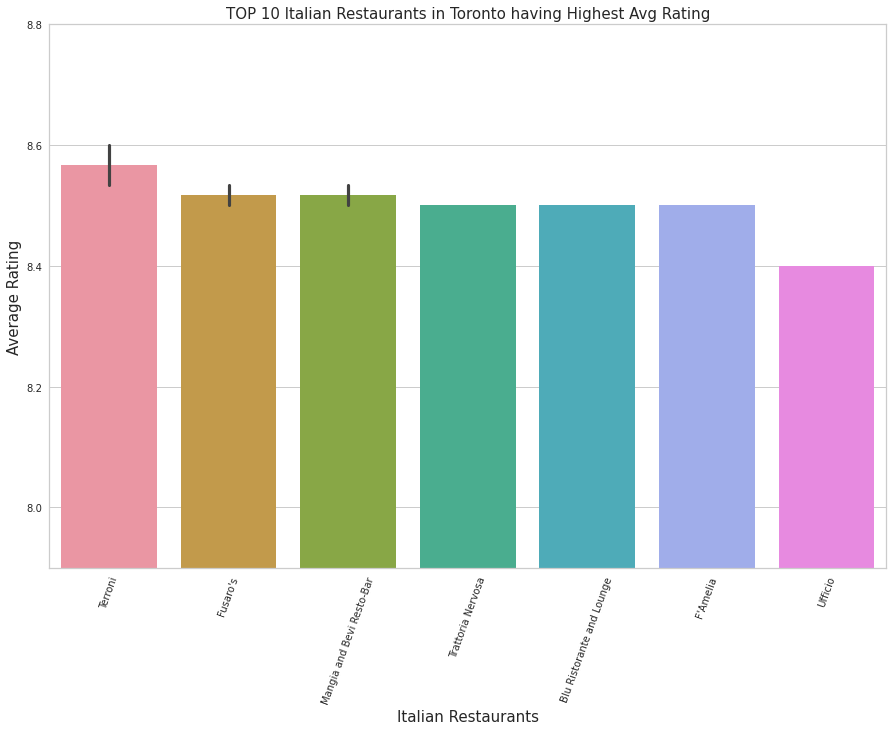

In [38]:
# We will Visualize the data in Bar Chart Graph
import seaborn as sns
fig = plt.figure(figsize=(15,10))
s=sns.barplot(x="Name", y="Average Rating", data=avg_final)
s.set_xticklabels(s.get_xticklabels(), rotation=70)
plt.title('TOP 10 Italian Restaurants in Toronto having Highest Avg Rating', fontsize=15)
plt.xlabel("Italian Restaurants", fontsize=15)
plt.ylabel ("Average Rating", fontsize=15)
plt.ylim(7.9, 8.8)
plt.savefig("TOP_10_Italian_Restaurant.png", dpi=300)
plt.show()

In [39]:
#venues.groupby('Neighborhood').count()
it_rest_toronto.groupby('Neighborhood').count()
it_rest_toronto.shape

(116, 4)

In [40]:
print('There are {} uniques Neighborhoods.'.format(len(it_rest_toronto['Neighborhood'].unique())))

There are 53 uniques Neighborhoods.


In [41]:
CLIENT_ID = 'GQFWSDLBBKZAEMWCJJHY0H3NPVDTNNTD1LM2N31SW12QUU5B' # your Foursquare ID
CLIENT_SECRET = 'FSHFXZWGV1V34VEVRGUYNV2ZZFSHL1FXVHITKTULNZYXRRFJ'
VERSION = '20180605' # Foursquare API version
print('Credentials Stored')

Credentials Stored


In [42]:
#Lets define a function to extract the venues data

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [43]:
Toronto_Venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                latitudes=df_toronto['Latitude'],
                                longitudes=df_toronto['Longitude'])

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [44]:
Toronto_Venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,RIGHT WAY TO GOLF,43.785177,-79.161108,Golf Course
2,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Great Shine Window Cleaning,43.783145,-79.157431,Home Service
3,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank


In [45]:
# Check how many unique categories
print('There are {} uniques categories.'.format(len(Toronto_Venues['Venue Category'].unique())))

There are 275 uniques categories.


**We will analize each neighborhood**

In [46]:
# one hot encoding
toronto_onehot = pd.get_dummies(Toronto_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhoods'] = Toronto_Venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()

(2136, 276)


,Neighborhoods,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [47]:
toronto_grouped = toronto_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(toronto_grouped.shape)
toronto_grouped.head()

(95, 276)


,Neighborhoods,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [48]:
# Now check in which neighborhood Italian Restuarants are present
it_res = toronto_grouped[["Neighborhoods","Italian Restaurant"]]
it_res = it_res.rename(columns={'Neighborhoods':'Neighborhood'})

it_res.head(10)

,Neighborhood,Italian Restaurant
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.080000
5,Berczy Park,0.017544
6,"Birch Cliff, Cliffside West",0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.045455
8,"Business reply mail Processing Centre, South C...",0.000000
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000


### Now we will cluster the Neighborhoods

We will use K-means clustering technique with Elbow point to get the best K.

In [49]:
## first import KMeans from sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = it_res.drop(['Neighborhood'], axis=1)
kmeans.fit(X)
kmeans.labels_[0:30]

array([0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [50]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [51]:
scores = [get_inertia(x) for x in range(2, 21)]

Text(0, 0.5, 'Error')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


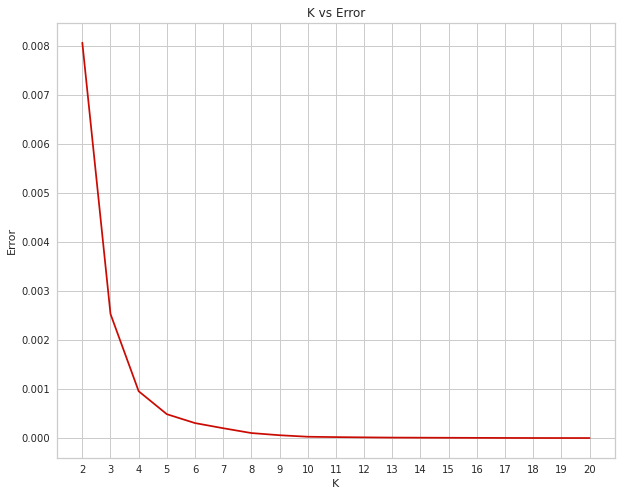

In [52]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r', )
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

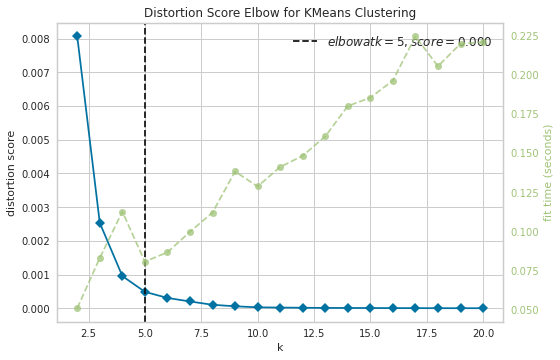

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,21))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

So we can analyze that an optimum value of K is **5**

In [57]:
kclusters = 5

tor_grouped_clustering = it_res.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 2, 1, 0, 2, 3, 2, 2], dtype=int32)

In [59]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
toronto_merged = it_res.copy()

# add clustering labels
toronto_merged["Cluster Labels"] = kmeans.labels_
toronto_merged.head()

,Neighborhood,Italian Restaurant,Cluster Labels
0,Agincourt,0.00,2
1,"Alderwood, Long Branch",0.00,2
2,"Bathurst Manor, Wilson Heights, Downsview North",0.00,2
3,Bayview Village,0.00,2
4,"Bedford Park, Lawrence Manor East",0.08,1


In [60]:
# Now merge toronto grouped with previous toronto data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(Toronto_Venues.set_index("Neighborhood"), on="Neighborhood")

print(toronto_merged.shape)
toronto_merged.head()

(2136, 9)


,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.0,2,43.794200,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
0,Agincourt,0.0,2,43.794200,-79.262029,Twilight,43.791999,-79.258584,Lounge
0,Agincourt,0.0,2,43.794200,-79.262029,El Pulgarcito,43.792648,-79.259208,Latin American Restaurant
0,Agincourt,0.0,2,43.794200,-79.262029,Mark's,43.791179,-79.259714,Clothing Store
1,"Alderwood, Long Branch",0.0,2,43.602414,-79.543484,Il Paesano Pizzeria & Restaurant,43.601280,-79.545028,Pizza Place


In [63]:
# sort the results by Cluster Labels
print(toronto_merged.shape)
toronto_merged.sort_values(["Cluster Labels"], inplace=True)
toronto_merged.head(10)

(2136, 9)


,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
75,Stn A PO Boxes,0.030612,0,43.646435,-79.374846,Loaded Pierogi,43.647965,-79.373427,Comfort Food Restaurant
75,Stn A PO Boxes,0.030612,0,43.646435,-79.374846,Scheffler's Deli,43.648643,-79.371537,Cheese Shop
75,Stn A PO Boxes,0.030612,0,43.646435,-79.374846,The Works Gourmet Burger Bistro,43.648742,-79.374142,Restaurant
75,Stn A PO Boxes,0.030612,0,43.646435,-79.374846,Walrus Pub & Beer Hall,43.647375,-79.379515,Pub
75,Stn A PO Boxes,0.030612,0,43.646435,-79.374846,Chotto Matte,43.646473,-79.378782,Japanese Restaurant
75,Stn A PO Boxes,0.030612,0,43.646435,-79.374846,Stonemill Bread,43.648668,-79.371610,Bakery
75,Stn A PO Boxes,0.030612,0,43.646435,-79.374846,Beerbistro,43.649419,-79.377237,Gastropub
75,Stn A PO Boxes,0.030612,0,43.646435,-79.374846,Crepe TO,43.650063,-79.374587,Creperie
75,Stn A PO Boxes,0.030612,0,43.646435,-79.374846,Buster's Sea Cove,43.648495,-79.371462,Seafood Restaurant
75,Stn A PO Boxes,0.030612,0,43.646435,-79.374846,The Omni King Edward Hotel,43.649191,-79.376006,Hotel


In [64]:
# To check how many locations has Italian Restaurants
toronto_merged['Venue Category'].value_counts()['Italian Restaurant']

41

We will create a new dataframe with the Neighborhood and Italian Restaurants

In [68]:
# create map
import folium # map rendering library

#Obtain the coordinates from the dataset itself, just averaging Latitude/Longitude of the current dataset 
latitude_toronto = df_toronto['Latitude'].mean()
longitude_toronto = df_toronto['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(latitude_toronto, longitude_toronto))

map_clusters = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Neighborhood Latitude'], toronto_merged['Neighborhood Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

The geographical coordinates of Toronto are 43.70460773398059, -79.39715291165048


**Number of neighborhoods per cluster**

In [67]:
it_res["Cluster Labels"] = kmeans.labels_
it_res.head()

,Neighborhood,Italian Restaurant,Cluster Labels
0,Agincourt,0.00,2
1,"Alderwood, Long Branch",0.00,2
2,"Bathurst Manor, Wilson Heights, Downsview North",0.00,2
3,Bayview Village,0.00,2
4,"Bedford Park, Lawrence Manor East",0.08,1


In [69]:
# How many neighborhoods in each cluster
it_res['Cluster Labels'].value_counts()

2    71
0    11
3     6
1     4
4     3
Name: Cluster Labels, dtype: int64

### Cluster 1

In [71]:
# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df2 = df[['Borough','Neighborhood']]
C1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]
df_c1 = pd.merge(df2, C1, on='Neighborhood')
df_c1.head()

,Borough,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,"Queen's Park, Ontario Provincial Government",0.029412,0,43.662301,-79.389494,Aroma Espresso Bar,43.658928,-79.389903,Café
1,Downtown Toronto,"Queen's Park, Ontario Provincial Government",0.029412,0,43.662301,-79.389494,Starbucks,43.660887,-79.393720,Coffee Shop
2,Downtown Toronto,"Queen's Park, Ontario Provincial Government",0.029412,0,43.662301,-79.389494,Hart House Gym,43.664172,-79.394888,Gym
3,Downtown Toronto,"Queen's Park, Ontario Provincial Government",0.029412,0,43.662301,-79.389494,Tim Hortons,43.659415,-79.391221,Coffee Shop
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",0.029412,0,43.662301,-79.389494,Convocation Hall,43.660828,-79.395245,College Auditorium


### Cluster 2

In [72]:
C2=toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]
df_c2 = pd.merge(df2, C2, on='Neighborhood')
df_c2.head()

,Borough,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,East Toronto,"The Danforth West, Riverdale",0.071429,1,43.679557,-79.352188,Bulk Barn,43.676790,-79.355865,Grocery Store
1,East Toronto,"The Danforth West, Riverdale",0.071429,1,43.679557,-79.352188,Starbucks,43.678879,-79.346357,Coffee Shop
2,East Toronto,"The Danforth West, Riverdale",0.071429,1,43.679557,-79.352188,Kitchen Stuff Plus,43.678613,-79.346422,Furniture / Home Store
3,East Toronto,"The Danforth West, Riverdale",0.071429,1,43.679557,-79.352188,Bar Oak,43.677931,-79.348724,Lounge
4,East Toronto,"The Danforth West, Riverdale",0.071429,1,43.679557,-79.352188,Don Valley Trail,43.676331,-79.353923,Trail


### Cluster 3

In [73]:
C3=toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]
df_c3 = pd.merge(df2, C3, on='Neighborhood')
df_c3.head()

,Borough,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,Parkwoods,0.0,2,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,North York,Parkwoods,0.0,2,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,North York,Victoria Village,0.0,2,43.725882,-79.315572,Cash Money,43.725486,-79.312665,Financial or Legal Service
3,North York,Victoria Village,0.0,2,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,North York,Victoria Village,0.0,2,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


### Cluster 4

In [75]:
C4=toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]
df_c4 = pd.merge(df2, C4, on='Neighborhood')
df_c4.head()

,Borough,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,Don Mills,0.041667,3,43.725900,-79.340923,Delimark Cafe,43.727536,-79.339547,Coffee Shop
1,North York,Don Mills,0.041667,3,43.725900,-79.340923,Sorento Restaurant,43.726575,-79.341989,Italian Restaurant
2,North York,Don Mills,0.041667,3,43.745906,-79.352188,Gonoe Sushi,43.745737,-79.345991,Japanese Restaurant
3,North York,Don Mills,0.041667,3,43.745906,-79.352188,LA Fitness,43.747665,-79.347077,Gym
4,North York,Don Mills,0.041667,3,43.745906,-79.352188,Baretto Caffé,43.744456,-79.346460,Café


### Cluster 5

In [76]:
C5=toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]
df_c5 = pd.merge(df2, C5, on='Neighborhood')
df_c5.head()

,Borough,Neighborhood,Italian Restaurant,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,Christie,0.058824,4,43.669542,-79.422564,Dupont Disco,43.670490,-79.426611,Nightclub
1,Downtown Toronto,Christie,0.058824,4,43.669542,-79.422564,Foto Grocery,43.667979,-79.428217,Grocery Store
2,Downtown Toronto,Christie,0.058824,4,43.669542,-79.422564,Marlenes Just Babies,43.671824,-79.420499,Baby Store
3,Downtown Toronto,Christie,0.058824,4,43.669542,-79.422564,Garrison Creek Park,43.671690,-79.427805,Park
4,Downtown Toronto,Christie,0.058824,4,43.669542,-79.422564,Sobeys Dupont,43.670977,-79.427573,Grocery Store


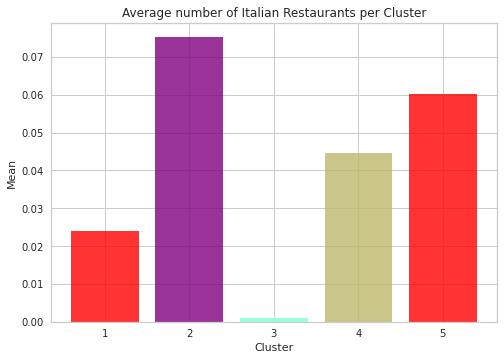

In [77]:
clusters_mean = [df_c1['Italian Restaurant'].mean(),df_c2['Italian Restaurant'].mean(),df_c3['Italian Restaurant'].mean(),
                 df_c4['Italian Restaurant'].mean(),df_c5['Italian Restaurant'].mean()]
objects = (1,2,3,4,5)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Italian Restaurants per Cluster')

plt.show()

**Cluster 2** has most of the Italian Restaurants followed by Cluster 5 and Cluster 4

## Results

After analyzing the data we observe different results as follows:-

* **Central Toronto and Downtown Toronto** have the most amount of Italian Restaurants in the city according of the bar plot above. So, we will see if there is any difference in the amount of Restaurants.

* We saw that **Central Toronto** Borough has 34 Italian Restaurants as **DownTown Toronto**, Followed by **West Toronto** which has 14 Italian Restaurants, as for **North York**, the Borough with most amount of neighborhoods, has only 8 Italian Restaurants.

* The **Davisville** neighborhood has the most amount of restaurants with 8 restaurants, followed by **Davisville North** with 6 restaurants 

* We saw that **Terroni** got the Max Likes and Tips, and that its rating isnt far from **Noce** rating. Also, it belongs to Dowtown Toronto Borough and Garden District, Ryerson Neighborhood.

* **Commerce Court, Victoria Hotel** Neighborhood has the to highest average rating italian restaurants in Toronto City with 8.6 rating. 

* We analized that **Terroni** has 2 restaurants in the same Borough, beeing those two with the highest Rating in their respected neighborhoods. Also, **Mangia and Bevi Resto-Bar** and **Fusaro's** hast 2 restaurants both in Downtown Toronto, also in 2 different Neighborhoods with the same rating.

* **Cluster 2** hast most of the italian restaurants in the city, followed by Cluster 5 and Cluster 4

## Discussion

According to the analysis we conclude that to taste the best Italian Food and visit the best Italian Restaurant in the Toronto city we have to visit **Terroni** as currently it has the highest Average Rating of 8.6 in Commerce Court, Victoria Hotel Neighborhood in Downtown Toronto. Also, for Business purposes it is recommended to start a business of Italian food in York Borough which has the least number of Italian Restaurants and the demand will be high as expected, but if you want to star a Italian Restaurant in a middle demand area it can be at the East Toronto Borough or East York Borough. But, for better engagement with client you could set up a restaurant near Little Italy, that is near Christie Neighborhood in Downtown Toronto.

Now the competition here will be in between Central Toronto and Downtown Toronto Borough as these are the top two areas where Italian restaurants are found.

## Conclusion

Finally, this is a small glimpse of how real life data-science projects look like. In this project I have imported different types of python libraries such as panda, numpy, matplotlib I have also used sckitlearn for cluster modeling. Used Foursquare api to get the latitude and longitude data of Toronto City by Geopy Client. I have explored the different Borough, Neighborhood of Toronto city and analyse the data to get different outcome for Italian Restaurants of different parts of the city.

This proyect gave me the knowledge and strenghts to encourage me with no fear of involving me in future Data Science proyects as a junior data scientist. I had the opportunity to egage in data wrangling, data cleansing, data analytics, data graphics and merge this with awesome results and conclusions that we could continue furthermore. 